# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

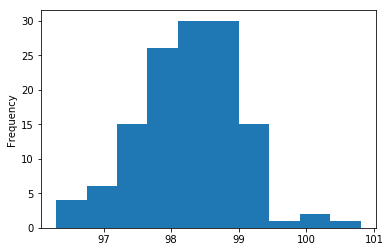

In [5]:
import matplotlib.pyplot as plt

df['temperature'].plot(kind='hist')
plt.show()

In [6]:
import numpy as np

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])

samples = np.random.normal(mean, std, size=10000)

In [7]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

In [8]:
x, y = ecdf(df['temperature'])

x_theor, y_theor = ecdf(samples)

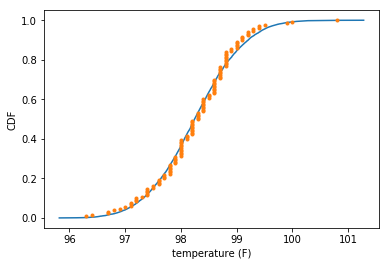

In [9]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker ='.', linestyle='none')
plt.xlabel('temperature (F)')
plt.ylabel('CDF')
plt.show()

CDF & ECDF show body temperature is normally distributed

## 2. Is the sample size large? Are the observations independent? 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Yes, n=130 and generally anything greater than 30 is considered 'large.'

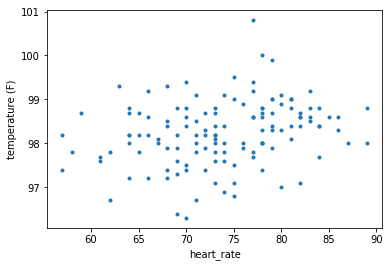

In [11]:
_ = plt.plot(df['heart_rate'], df['temperature'], marker='.', linestyle='none')
plt.xlabel('heart_rate')
plt.ylabel('temperature (F)')

plt.show()

The observations appear to be independent.

## 3. Is the true population mean really 98.6 degrees F?

    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the tt or zz statistic?
    Now try using the other test. How is the result be different? Why? 

Since we're comparing a known temperature mean and a sample mean, it would be appropriate for us to use a one-sample test.

Since the sample size is over 30, we should use the z statistic.

In [28]:
from scipy import stats

x = len(df['temperature'])
y = np.std(df['temperature'])/np.sqrt(x)

Zstat = (np.mean(df['temperature']) - 98.6)/y

p_val = stats.norm.sf(np.abs(Zstat))*2

print("z-statistic is: ", Zstat)
print("p-value is: ", p_val)

z-statistic is:  -5.47592520208
p-value is:  4.35231516588e-08


In [17]:
from scipy import stats

stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The p-value for the t-statistic is slightly higher than the p-value from the z-statistic

## 4.Draw a small sample of size 10 from the data and repeat both tests.

    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application 
    of the tt and zz statistic? 

Since the sample size is under 30, we should use the t statistic.

In [18]:
df1 = np.random.choice(df['temperature'], 10)

In [19]:
stats.ttest_1samp(df1, popmean=98.6)

Ttest_1sampResult(statistic=-1.5029352320810749, pvalue=0.16710567834077139)

In this particular case, the pvalue is greater than 0.05 and the null hypothesis would NOT be rejected.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

    Start by computing the margin of error and confidence interval. 

In [20]:
conf_int = np.percentile(df['temperature'], [2.5, 97.5])
conf_int

array([ 96.7225,  99.4775])

Temperature is considered abnormal when below 96.7 and above 99.4.

## 6.Is there a significant difference between males and females in normal temperature?

    What test did you use and why?
    Write a story with your conclusion in the context of the original problem. 

In [21]:
m_df = df[df['gender'] == 'M']
f_df = df[df['gender'] == 'F']

In [22]:
m_df['temperature'].describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [23]:
f_df['temperature'].describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [24]:
m_samp = np.random.normal(np.mean(m_df['temperature']), np.std(m_df['temperature']), size=10000)

In [25]:
f_samp = np.random.normal(np.mean(f_df['temperature']), np.std(f_df['temperature']), size=10000)

In [26]:
x_theor_m, y_theor_m = ecdf(m_samp)
x_theor_f, y_theor_f = ecdf(f_samp)
x_m, y_m = ecdf(m_df['temperature'])
x_f, y_f = ecdf(f_df['temperature'])

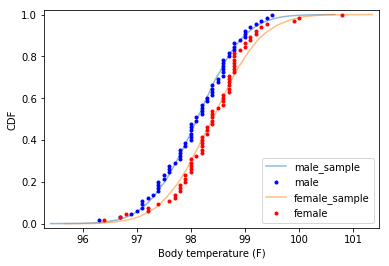

In [27]:
_ = plt.plot(x_theor_m, y_theor_m, alpha=0.5)
_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_theor_f, y_theor_f, alpha=0.5)
_ = plt.plot(x_f, y_f, marker='.', linestyle='none', color='red')

_ = plt.xlabel('Body temperature (F)')
_ = plt.ylabel('CDF')

plt.margins(0.02)
plt.legend(('male_sample','male','female_sample', 'female'), loc='lower right')
plt.show()

Generally, female body temperatures are slightly higher than those of men.